# Titanic Competition - Machine Learning from Disaster

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [596]:
# loading data 

titanic = pd.read_csv('train.csv') 
Test_titanic = pd.read_csv('test.csv')  

## Data Overview

#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**SibSp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [458]:
titanic.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [459]:
Test_titanic.head()  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [598]:
print(titanic.shape)
print(Test_titanic.shape) 

(891, 12)
(418, 11)


In [8]:
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have many missing values in the variables Age and Fare, and several other values between in the variable Embarked, we will need to fill these.

## Exploratory Data Analysis

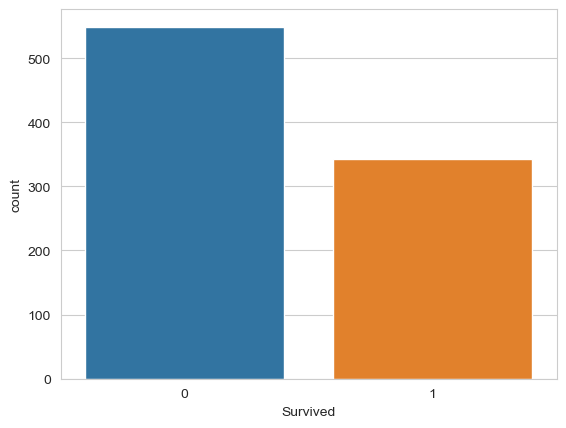

In [604]:
# How many people survived?

sns.set_style("whitegrid") #setting style of the plots

sns.countplot(x = "Survived", data = titanic)  

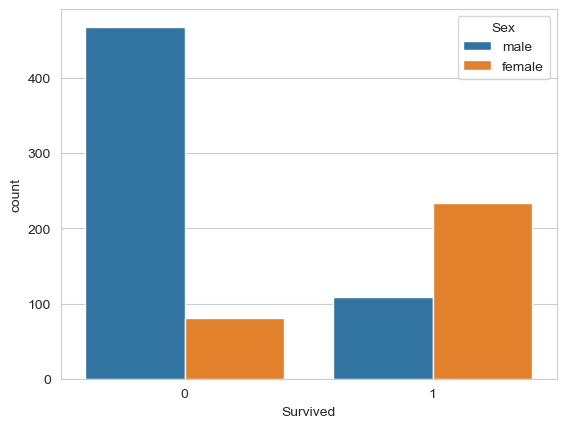

In [605]:
# How many people survived by sex? 

sns.countplot(x = "Survived", hue = "Sex", data = titanic) 

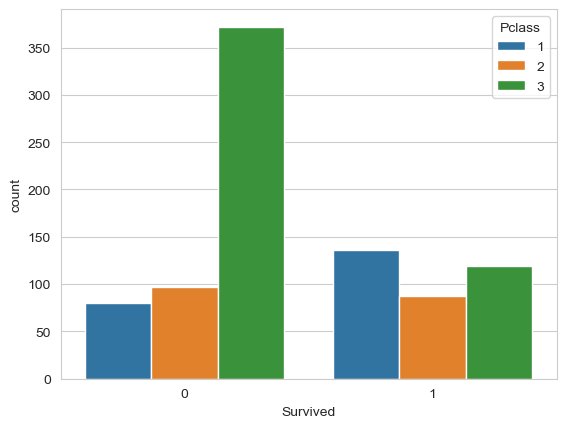

In [606]:
# How many people survived taking class into account?

sns.countplot(x = "Survived", hue = "Pclass", data = titanic)  

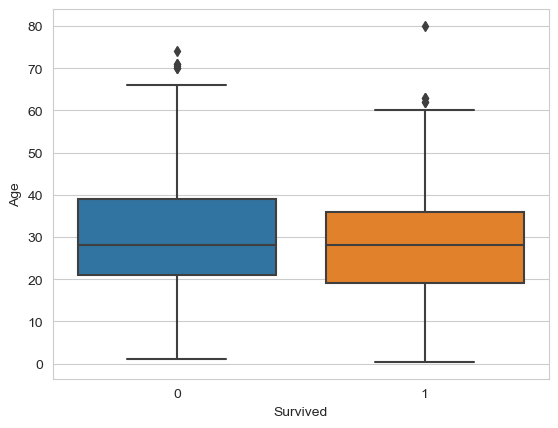

In [607]:
# Plotting of variable age against survival

sns.boxplot(x="Survived", y= "Age", data=titanic)  

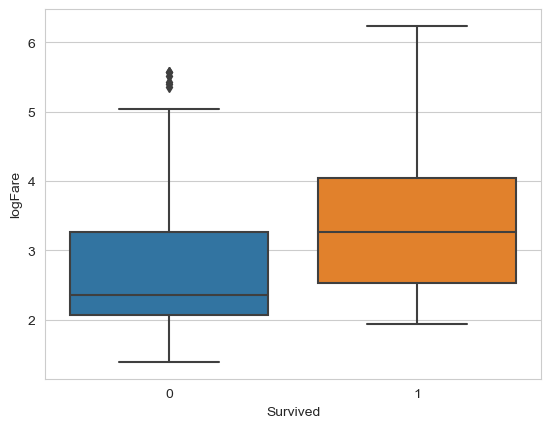

In [608]:
# Plotting differences between survival according to the fare paid

titanic['logFare'] = np.log(titanic['Fare']) # big outliers in Fare, we apply logarithmic scale
sns.boxplot(x="Survived", y= 'logFare', data=titanic) 
titanic.drop('logFare', axis = 1, inplace = True) # We remove this feature right after

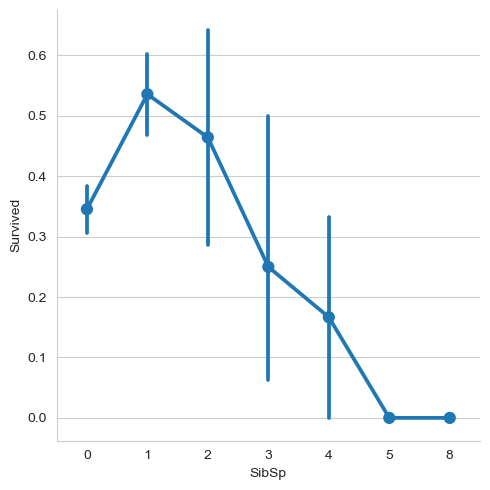

In [609]:
# SibSp against survival

sns.factorplot(x = 'SibSp', y = 'Survived', data = titanic) 

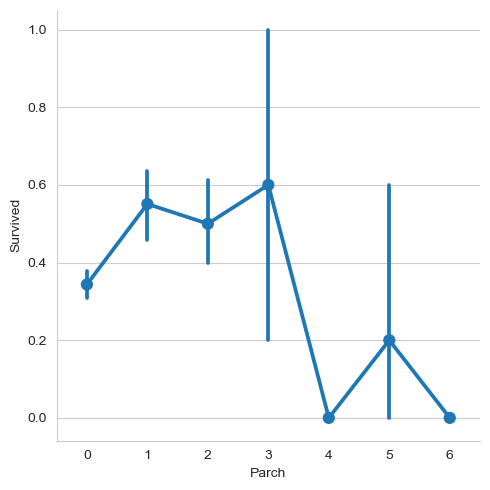

In [610]:
# With Parch, it follows a similar distribution with SibSp

sns.factorplot(x = 'Parch', y = 'Survived', data = titanic) 

**EDA Conclussion**: There seems to be correlation between the survival rate and sex, women are prone to survive whereas men are not. Class seems to play an important role in the survival rate as well so does the fare paid, all these variables might incide in collinearity as seems highly related to each other, we will have to examine the correlation between the variables to decide whether what to include and what not. But in general there seems to be a pattern between higher class/higher fare paid and the probability of surviving.

The relation between age and survival doesn't seem that clear from the boxplot we got, we will need to further examine this relation.

The number of siblings and spouses seem to be related to the number of parents and children withing a family, so it would be interesting to add these two variables to create a 'Number of relatives' variable. Seems like the more relatives on board have a negative impact on the survival rate.

## Data Preprocessing

In [611]:
# We first join the datasets so we can apply all the transformations to them.

traintest = pd.concat([titanic.drop('Survived', axis = 1), Test_titanic], axis = 0) 

In [461]:
traintest.shape

(1309, 11)

In [462]:
traintest.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [612]:
# There is now a missing value in the Fare variable as well
# Checking the null values of every column

traintest.isnull().sum(axis=0) 

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Dealing with Missing Values 

In [613]:
# Let's see the differences in ages taking into account both Sex and Pclass:

traintest['Age'].groupby([traintest['Pclass'], traintest['Sex']]).mean() 

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [614]:
# Defining a variable to impute age using Pclass and Sex variables

age_means = traintest.groupby(['Sex', 'Pclass'])['Age']
traintest.Age = age_means.transform(lambda x: x.fillna(x.mean())) 
sum(traintest['Age'].isnull()) 

0

Most of the Cabin variable values are null values, these null values might be meaningful
as they must represent those passengers that didn't have any cabin assigned, so let's give those null values the letter 'N' as in 'None'

In [615]:
# Let's fill the null values with the letter 'N'

traintest['Cabin'].fillna('N', inplace = True)  

In [616]:
traintest['Cabin'] = traintest['Cabin'].apply(lambda x: str(x)[0])   
traintest['Cabin'].unique() 

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [617]:
# There seem to be still null values in the 'Embarked' variable

traintest['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [618]:
# We can replace these null values using the most common value for Embarked which is S

traintest['Embarked'] = traintest['Embarked'].fillna('S') 

In [619]:
# To get rid of the null value in Fare we will use the median, as it'd be more 
#representative given that the Fare variable contains a significant number of  outliers

traintest['Fare'] = traintest['Fare'].fillna(traintest['Fare'].median()) 

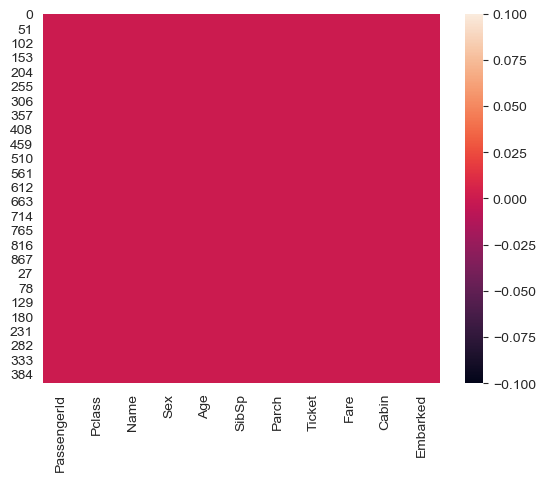

In [623]:
# Let's check if we've gotten rid of all the null values

sns.heatmap(traintest.isnull()) 

### Feature Engineering

In [624]:
# Let's grab just the title of every person instead of their names

traintest['Title'] = traintest['Name'].apply(lambda x: x.split(', ')[1].split('.')[0]) 

In [625]:
# Counting the occurrences of all the titles

traintest.groupby(['Title'])['Title'].count() 

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: Title, dtype: int64

In [626]:
# Let's group them together dividing them into Mr, Miss, Master and Distinguished

traintest["Title"] = traintest["Title"].replace(['Lady', 'the Countess','Capt', 
                                             'Col', 'Dr', 'Major', 'Rev', 'Sir', 
                                             'Jonkheer'], 'Distinguished') 
traintest['Title'] = traintest['Title'].replace(['Don', 'Mr'], 'Mr')
traintest['Title'] = traintest['Title'].replace(['Miss', 'Mlle', 'Mme', 'Mrs', 'Ms', 
                                                 'Dona'], 'Miss') 
# And let's get rid of the Name variable as we won't use it anymore
traintest.drop('Name', axis = 1, inplace = True) 

In [627]:
traintest['Title'].unique() 

array(['Mr', 'Miss', 'Master', 'Distinguished'], dtype=object)

In [628]:
# As we saw earlier, Parch and SibSp seemed to be somewhat related, let's create a new
#variable adding both columns as number of relatives present in the Titanic.

traintest['relatives'] = traintest['SibSp'] + traintest['Parch'] 
traintest.drop(['SibSp', 'Parch'], axis = 1, inplace = True) # we drop them right afterwards

In [629]:
#We couldn't find any pattern in the ticket numbering, so it'd be better to drop that column
# We won't need the PassengerId, either

traintest.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True) 

### Label-Encoding Categorical Variables

We will encode all the categorical variables into numeric ones for convenience, as most of the machine learning algorithms work better with numeric data.

In [630]:
le = preprocessing.LabelEncoder() 

le.fit(traintest['Sex'])
traintest['Sex'] = le.transform(traintest['Sex']) 

We will use frequency label encoding for the rest of categorical variables, as in every one of these variables there are at least one category that is overrepresented with a much higher frequency than the others.

In [631]:
fe = np.round(traintest.groupby('Embarked').size()/len(traintest), 2) 
traintest.loc[:, 'Embarked'] = traintest['Embarked'].map(fe) 

In [632]:
fc = np.round(traintest.groupby('Cabin').size()/len(traintest), 2) 
traintest.loc[:, 'Cabin'] = traintest['Cabin'].map(fc) 

In [633]:
ft = np.round(traintest.groupby('Title').size()/len(traintest), 2)  
traintest.loc[:, 'Title'] = traintest['Title'].map(ft) 

In [634]:
traintest.head() 

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,relatives
0,3,1,22.0,7.2500,0.77,0.70,0.58,1
1,1,0,38.0,71.2833,0.07,0.21,0.35,1
2,3,0,26.0,7.9250,0.77,0.70,0.35,0
3,1,0,35.0,53.1000,0.07,0.70,0.35,1
4,3,1,35.0,8.0500,0.77,0.70,0.58,0


### Data Frame Split (Train, Test and Test-Test)

Before normalizing the different variables we need to split them, we will use the first split that we were given between the train set (up to the row 891) and the test for the competition (last 418 rows), the train set will be also divided into a training and test set to test our models.

In [635]:
train = traintest[0:891]
test = traintest[891:] 

In [636]:
# Adding back the survived column to the trainset

train['Survived'] = titanic['Survived'] 

In [637]:
# Now let's split the train dataset between the X (non-target features) and y (target) 
X = train.drop('Survived', axis = 1)
y = train['Survived'] 

In [638]:
# We will use the following split for training our models:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)     

#### EDA with the new features

Now that we have the Survived variable back in our data set we can see how the new variables behave against the Survived variable.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

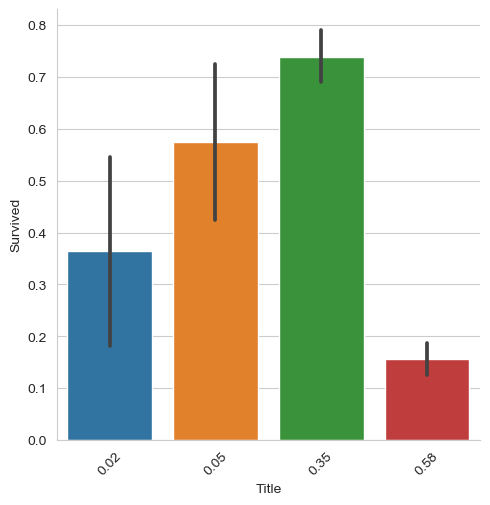

In [639]:
sns.factorplot(x = 'Title', y = 'Survived', data = train, kind = 'bar') 
plt.xticks(rotation=45) 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

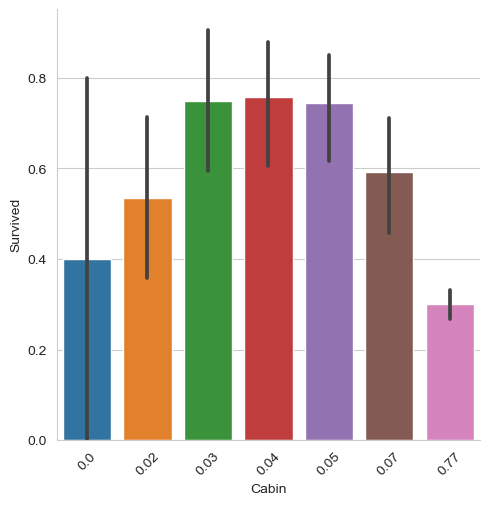

In [640]:
sns.factorplot(x = 'Cabin', y = 'Survived', data = train, kind = 'bar') 
plt.xticks(rotation=45) 

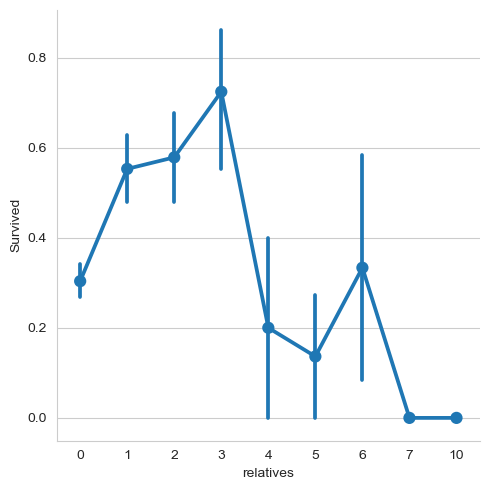

In [641]:
sns.factorplot(x = 'relatives', y = 'Survived', data = train)  

In [642]:
corr_titanic = train.corr() 
mascara = corr_titanic.where(np.tril(np.ones(corr_titanic.shape)).astype(np.bool)) 

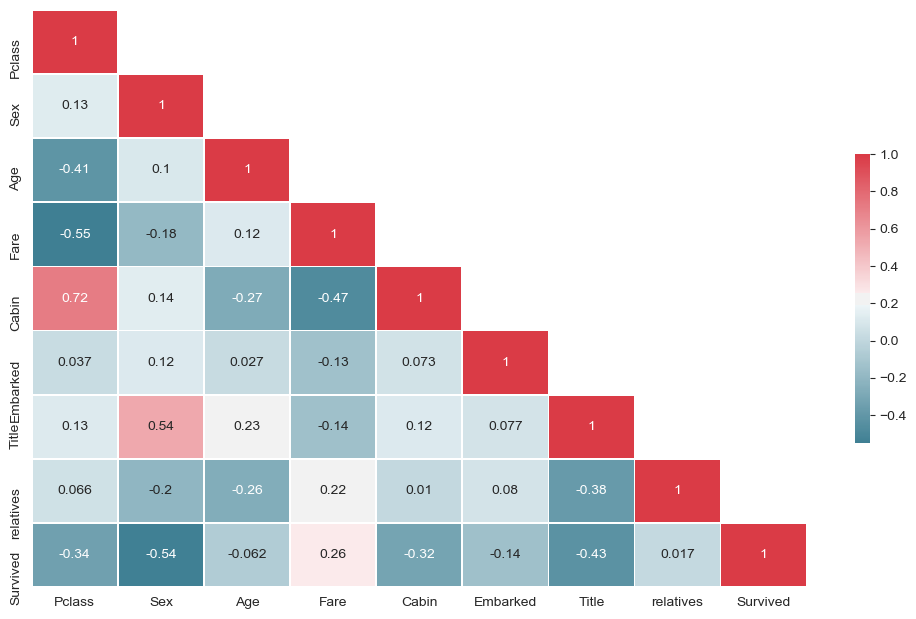

In [732]:
plt.figure(figsize=(12.5,7.5)) 

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corrmap=sns.heatmap(mascara, annot = True, cmap = cmap, linewidths=.5, cbar_kws={"shrink": .5})  

**2nd EDA conclusions**: We can see that the title plays a role in the survival of the passengers, those with the title 'Mister' or equivalent are the ones that survived the less, whereas those with the title 'Miss' or equivalent are the ones that suvived the most, followed by the crew (those whose title is 'Master') and those with a distinguished title.

Those who weren't assigned any cabin are also the ones with a smallest survival rate, these passengers were most surely 3rd class, the class with the smallest chance of survival as we saw earlier.

In the correlation matrix we can see that survival is most correlated with the sex, followed by class, cabin and fare paid. Fare, Class and Cabin and highly correlated, specially Class and Cabin with a correlation coefficient of 0.72, this could lead to colinearity but I decided to keep it in our model as the cabin gives information about the location in the boat as well and not only the class.

### Scaling Numeric Variables

It's best practice to scale the different variables separatedly.
As Fare is a continuous variable with an important number of outliers we will use the .PowerTransformer() method from the scikit learn library.

In [648]:
pt_X = PowerTransformer()
pt_X = pt_X.fit(X_train) 
X_train = pd.DataFrame(pt_X.transform(X_train))
X_train.columns = ['Pclass', 'Sex', 'Age', 'Fare','Cabin', 'Embarked', 'Title', 
                   'relatives'] 

In [649]:
pt_Xt = PowerTransformer() 
pt_Xt = pt_Xt.fit(X_test) 
X_test = pd.DataFrame(pt_Xt.transform(X_test)) 
X_test.columns = ['Pclass', 'Sex', 'Age', 'Fare','Cabin', 'Embarked', 'Title', 
                   'relatives']  

In [650]:
pt_test = PowerTransformer() 
pt_test = pt_test.fit(test) 
test = pd.DataFrame(pt_test.transform(test)) 
test.columns = ['Pclass', 'Sex', 'Age', 'Fare','Cabin', 'Embarked', 'Title', 
                   'relatives'] 

## Modeling 

We will now fit different machine learning models to the data and see which one is the best for predicting the data.

Every model will be tested against the test y_test dataset to see which one performs the best, every model will also be cross validated to see if the model performance is consistent accross different data samples, calculating for this purpose its mean of results and standard deviation.

### Logistic Regression

In [651]:
# Fitting the model

logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Hyperparameter Optimizaton

In [653]:
# Finding the best threeshold for the logistic regression model:

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):   
    '''Takes the probabilities and returns the labels (either 0 or 1) given a threshold'''
    return (pos_probs >= threshold).astype('int') 

def optimal_threshold(model, test):
    '''Takes a test set and a model and returns the threshold that gives the best F-score'''
    # predict probabilities
    yhat = model.predict_proba(test)
    # keep probabilities for the positive outcome only
    probs = yhat[:,1] 
    # define thresholds
    thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold using f1_score as it tests the accuracy
    scores = [accuracy_score(y_test, to_labels(probs, t)) for t in thresholds] 
    # get best threshold
    ix = np.argmax(scores)
    return print('Threshold=%.3f, Accuracy Score=%.5f' % (thresholds[ix], scores[ix]))

optimal_threshold(logmodel, X_test)  

Threshold=0.514, Accuracy Score=0.84407


In [654]:
threshold = 0.514

# Finding the best parameters

param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

logmodel = GridSearchCV(LogisticRegression(), param_grid) 
logmodel.fit(X_train, y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [655]:
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
logmodel.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predictions from the Logistic Regression model 

In [656]:
# selecting predictions according to the threshold

def pred_optimal_threshold(model, df, threshold):
    '''Returns the predictions taking a threeshold as an argument'''
    yhat = model.predict_proba(df)
    # We take just the probabilities of being positive [:,1] and transpose it for comparison
    return (yhat >= threshold).astype('int')[:,1].T

logmodel_preds = pred_optimal_threshold(logmodel, X_test, threshold = 0.514)  

In [676]:
def report_confmatrix(model_preds):
    '''Returns both, a confusion matrix and a classification report'''
    return print(confusion_matrix(y_test, logmodel_preds), ('\n'), 
                 classification_report(y_test, logmodel_preds))

report_confmatrix(logmodel_preds)  

[[159  16]
 [ 30  90]] 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.75      0.80       120

    accuracy                           0.84       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



#### Validation (Logistic Regression) 

In [658]:
def validation_mean_std(model):
    '''Accepts a model and returns the mean and standard deviation of the different
    cross validations (cross validation of 5 folds)'''
    scores = cross_val_score(model, X, y, cv = 5)
    return print(scores.mean(), scores.std()) 

In [659]:
def validation_mean_std(model):
    '''Accepts a model and returns the accuracy mean and the standard deviation from the 5 folds cross
    validation'''
    scores = cross_val_score(model, X, y, cv = 5)
    return scores.mean(), scores.std()  

In [660]:
validation_mean_std(logmodel) 

(0.8125666938673028, 0.007692599698129739)

### Random Forest

In [661]:
rfc = RandomForestClassifier(oob_score = True, random_state = 1) 
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

#### Parameter Optimization of the Random Forest

In [662]:
param_grid = {'min_samples_leaf' : [1, 4, 6, 8, 10], 
              'min_samples_split' : [2, 4, 6, 8, 10, 12, 16], 
              'n_estimators': [200, 500, 800],
              'criterion' : ["gini", "entropy"],
              'max_depth': [ 20, 30, 40, 50, None]}

RS = RandomizedSearchCV(estimator = rfc, 
                        param_distributions = param_grid, 
                        n_iter = 100, verbose = 2, 
                        random_state = 42, n_jobs = -1)
RS.fit(X_train, y_train) 
RS.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_depth': 30,
 'criterion': 'gini'}

In [663]:
rfc_model = RandomForestClassifier(oob_score = True, random_state = 1, n_estimators = 200,
                            min_samples_split = 12, min_samples_leaf = 4, 
                            max_depth = 30, criterion = 'gini') 
rfc_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [665]:
optimal_threshold(rfc_model, X_test) 

Threshold=0.472, Accuracy Score=0.84068


#### Predictions Random Forest

In [667]:
rfc_preds = pred_optimal_threshold(rfc_model, X_test, threshold = 0.472)    

In [668]:
report_confmatrix(rfc_preds) 

[[159  16]
 [ 30  90]] 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.75      0.80       120

    accuracy                           0.84       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



In [669]:
# Validation

validation_mean_std(rfc_model) 

(0.8271420500910176, 0.017351376675183026)

### Gradient Boost Classifier

In [670]:
score_gbes = [] 
n_estimators = 500


# We specify that if the scores don't improve by atleast 0.01 for the last
# 10 stages, stop fitting additional stages
gbes = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, 
                                           validation_fraction=0.2, 
                                           n_iter_no_change=5, tol=0.01, random_state=42) 

gbes.fit(X_train, y_train) 
score_gbes.append(gbes.score(X_test, y_test))

print(score_gbes)
print('')
print(gbes.n_estimators_) 

[0.8271186440677966]

23


In [672]:
optimal_threshold(gbes, X_test)  

Threshold=0.470, Accuracy Score=0.82712


In [677]:
# Predictions 

gbes_preds = pred_optimal_threshold(gbes, X_test, threshold = 0.470)
report_confmatrix(gbes_preds) 

[[159  16]
 [ 30  90]] 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.75      0.80       120

    accuracy                           0.84       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



In [678]:
# Validation

validation_mean_std(gbes)  

(0.8305065595380077, 0.012252747118109893)

### XGBoost Classifier

In [679]:
xgb = XGBClassifier() 
xgb.fit(X_train, y_train) 
xgb.score(X_test, y_test) 

0.8338983050847457

In [681]:
# Parameter Optimization

gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4) 

# Fit RandomizedSearchCV to the data
xgb_random.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=10,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...ht=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated'

In [683]:
print(xgb_random.best_params_) 

{'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.6, 'colsample_bytree': 0.6}


In [684]:
xgb_model = XGBClassifier(n_estimators = 10, max_depth = 6, learning_rate = 0.6,
                         colsample_bytree = 0.6) 
xgb_model.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [686]:
optimal_threshold(xgb_model, X_test) 

Threshold=0.599, Accuracy Score=0.83051


In [688]:
# Predictions 

xgb_preds = pred_optimal_threshold(xgb_model, X_test, threshold = 0.599)
report_confmatrix(xgb_model)  

[[159  16]
 [ 30  90]] 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.75      0.80       120

    accuracy                           0.84       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



In [689]:
# Validation

validation_mean_std(xgb_model) 

(0.8350009415604797, 0.024090870769792324)

In [587]:
# Creating the submission file

xgb_model.fit(X_train, y_train) 
xgb_preds = pred_optimal_threshold(xgb_model, test, threshold = 0.599)
create_submission('xgb_preds', xgb_preds) 

We got a score of 0.77511 in the competition using this model.

### LightGBM

In [690]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)  
lgb_model.score(X_test, y_test)  

0.8135593220338984

In [691]:
# Getting the optimal threshold

optimal_threshold(lgb_model, X_test) 

Threshold=0.543, Accuracy Score=0.82034


In [692]:
# Predictions 
threshold = 0.543
lgb_preds = pred_optimal_threshold(lgb_model, X_test, threshold)
report_confmatrix(lgb_model) 

[[159  16]
 [ 30  90]] 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.75      0.80       120

    accuracy                           0.84       295
   macro avg       0.85      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



In [693]:
# Validation

validation_mean_std(lgb_model) 

(0.8339150084740442, 0.019129780037096422)

### Model Comparisson

In [694]:
models = [logmodel, rfc_model, gbes, xgb_model, lgb_model] 
accuracies = [] 
stds = [] 

for i in range(len(models)):
    accuracies.append(validation_mean_std(models[i])[0]) 
    stds.append(validation_mean_std(models[i])[1]) 

In [695]:
model_results = pd.DataFrame([models, accuracies, stds]).T
model_results.columns = ['Model', 'Average Accuracy', 'Average Std'] 
model_results.Model = ['Logistic Regression', 'Random Forest', 'Gradient Boost',
                      'XGBClassifier', 'LGBClassifier'] 

In [696]:
model_results

,Model,Average Accuracy,Average Std
0,Logistic Regression,0.812567,0.0076926
1,Random Forest,0.827142,0.0173514
2,Gradient Boost,0.830507,0.0122527
3,XGBClassifier,0.835001,0.0240909
4,LGBClassifier,0.833915,0.0191298


(0.775, 0.875)

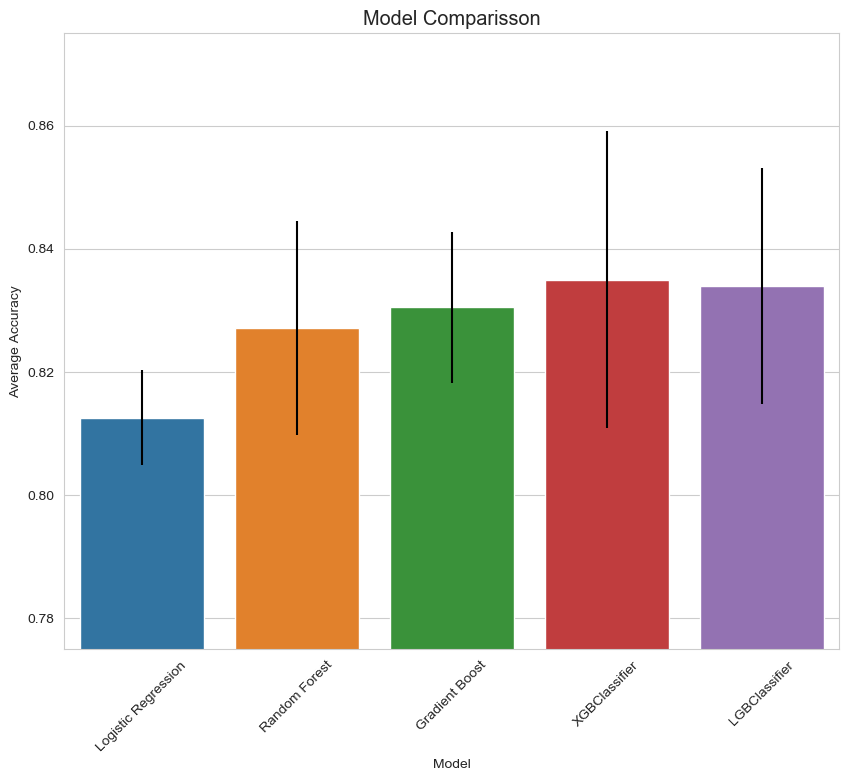

In [698]:
plt.figure(figsize=(10,8)) 
sns.barplot(y = 'Average Accuracy', x = 'Model', yerr = model_results['Average Std']*1, 
            capsize=.2, data = model_results)  
plt.xticks(rotation=45) 
plt.title('Model Comparisson', fontsize = 'x-large')
plt.ylim(0.775, 0.875)   

**Conclusion**: The XGBClassifier seems to be algorithm that gave us the best accuracy score using cross validations with 5 folds (~ 83%), but it's also the model that had the greatest relative standard deviation (~ 3%), whereas our Logistic Regression model had the smallest standard deviation (~ 0.7%) but also the lowest accuracy score (~ 81%). 

The most balanced ones would be the Gradient Boost and the LGBClassifier, both with a score of 83% approximateldy and a relative standard deviation between 1% and 2%.

## Ensemble

We need to improve our score and for that purpose we will now create different ensembling models, for the ensembling we will use the models we have already tried and we will ensemble them different ensembling techniques, namely: Ensembling with equal weights, weighted ensembling, manual stacking, stacking and voting classifier.

We first need to collect all the probabilities given by the different models.

In [699]:
logmodel_proba = pd.DataFrame(logmodel.predict_proba(X_test))[1] 
rfc_proba = pd.DataFrame(rfc_model.predict_proba(X_test))[1]
gbes_proba = pd.DataFrame(gbes.predict_proba(X_test))[1] 
xgb_proba = pd.DataFrame(xgb_model.predict_proba(X_test))[1]
lgb_proba = pd.DataFrame(lgb_model.predict_proba(X_test))[1] 

### Ensembling with equal weights

In [700]:
# Ensembling with equal weights

ens_val_prob = 0.2*logmodel_proba + 0.2*rfc_proba + 0.2*gbes_proba + 0.2*xgb_proba + 0.2*lgb_proba

In [701]:
# Looking for the optimal threshold

def optimal_threshold_ensemble(probas):
    '''Accepts probabilities and return the best possible threshold'''
    accuracy_scores = [] 
    thresholds = [] 
    for t in np.arange(0.00, 0.99, 0.01):
        accuracy_scores.append(accuracy_score(y_test, (probas >= t).astype('int'))) 
        thresholds.append(t)
    return thresholds[np.argmax(accuracy_scores)]  

optimal_threshold_ensemble(ens_val_prob)  

0.47000000000000003

In [702]:
# Predictions of the ensembled model:
threshold = 0.47
ens_val_pred = [1 if x >= threshold else 0 for x in ens_val_prob] 

print(confusion_matrix(y_test, ens_val_pred))
print('') 
print(classification_report(y_test, ens_val_pred))  

[[163  12]
 [ 36  84]]

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       175
           1       0.88      0.70      0.78       120

    accuracy                           0.84       295
   macro avg       0.85      0.82      0.82       295
weighted avg       0.84      0.84      0.83       295



In [ ]:
# Now let's apply this to the data we want to predict for the competition

In [703]:
logmodel_proba = pd.DataFrame(logmodel.predict_proba(test))[1] 
rfc_proba = pd.DataFrame(rfc_model.predict_proba(test))[1]
gbes_proba = pd.DataFrame(gbes.predict_proba(test))[1] 
xgb_proba = pd.DataFrame(xgb_model.predict_proba(test))[1]
lgb_proba = pd.DataFrame(lgb_model.predict_proba(test))[1] 

ens_val_prob = 0.2*logmodel_proba + 0.2*rfc_proba + 0.2*gbes_proba + 0.2*xgb_proba + 0.2*lgb_proba

In [704]:
ens_val_pred = [1 if x >= threshold else 0 for x in ens_val_prob] 

In [492]:
def create_submission(name, preds):
    '''Accepts a name and an array with the predictions, it returns a .csv file prepared to be submitted'''
    preds = pd.DataFrame(preds)
    preds.columns = ['Survived']
    preds['PassengerId'] = Test_titanic['PassengerId']
    preds.to_csv(name+'.csv', index = False) 

create_submission('ens_val_pred', ens_val_pred)  

This one gave us a score of 0.77511 in the competition

### Weighted Ensembling

Let's try now using a weighted approach, we will take into consideration what we found out in the model comparisson

In [705]:
ens_weight_prob = (
    0.15*logmodel_proba + 0.1*rfc_proba + 0.30*gbes_proba + 0.2*xgb_proba + 0.25*lgb_proba
) 

In [706]:
ens_weighted_pred = [1 if x >= 0.5 else 0 for x in ens_weight_prob] 

In [498]:
create_submission('ens_weighted_pred', ens_weighted_pred) 

This ensemble gave us 0.77511, same score as before.

### Ensembling using Machine Learning (Manual Stacking)

In [707]:
def ensembling_engine(models_list, train_x, train_y, test_x, ensembler):
    '''Accepts a list of models to ensemble, a train dataset with the features, a trainset with the target, 
    a test dataset with the features and an ensembler model. It returns a matrix with the probabilities'''
    # Creates a train matrix and populate it with the probabilities calculated by the models using X_train.
    train_matrix = np.empty((train_x.shape[0], len(models_list))) 
    for n, model in enumerate(models_list):
        train_matrix[:,n] = pd.DataFrame(model.predict_proba(train_x))[1]
    # Fits the ensembler to the train matrix and the target dataset
    ensembler.fit(train_matrix, train_y) 
    # Creates a test matrix and populates it with the probabilitites calculated by the models using X_test    
    test_matrix = np.empty((test_x.shape[0], len(models_list)))
    for n, model in enumerate(models_list):
        test_matrix[:,n] = pd.DataFrame(model.predict_proba(test_x))[1]
    # Calculates the probabilities using the ensembler over the test matrix
    ens_proba = ensembler.predict_proba(test_matrix)
    # Returns a matrix with the probabilities
    return ens_proba        

#### Ensembling using a Logistic Regression model

In [708]:
ensembler = LogisticRegression() 

In [709]:
lr_ens_val_prob = ensembling_engine(models, X_train, y_train, X_test, ensembler) 
lr_ens_val_prob = pd.DataFrame(lr_ens_val_prob)[1] 

In [710]:
optimal_threshold_ensemble(lr_ens_val_prob) 

0.5

In [711]:
threshold = 0.5
lr_ens_val_pred = [1 if x >= threshold else 0 for x in lr_ens_val_prob] 

In [713]:
def classification_report_ensemble(preds):
    return print(confusion_matrix(y_test, preds), (''), 
                classification_report(y_test, preds))

classification_report_ensemble(lr_ens_val_pred) 

[[160  15]
 [ 38  82]]                precision    recall  f1-score   support

           0       0.81      0.91      0.86       175
           1       0.85      0.68      0.76       120

    accuracy                           0.82       295
   macro avg       0.83      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



In [714]:
# Let's calculate it now using the test set

lr_ens_val_prob = ensembling_engine(models, X_train, y_train, test, ensembler) 
lr_ens_val_prob = pd.DataFrame(lr_ens_val_prob)[1] 
lr_ens_val_pred = [1 if x >= threshold else 0 for x in lr_ens_val_prob] 

In [540]:
# Creating the submission file
create_submission('lr_ens_pred', lr_ens_val_pred) 

We got a score of 0.7799, it's an improvement over the unweighted and weighted models previously used.

#### Ensembling using a Random Forest model

In [715]:
ensembler = RandomForestClassifier() 
rfc_ens_val_prob = ensembling_engine(models, X_train, y_train, X_test, ensembler) 
rfc_ens_val_prob = pd.DataFrame(rfc_ens_val_prob)[1] 

In [716]:
optimal_threshold_ensemble(rfc_ens_val_prob) 

0.25

In [717]:
threshold = 0.25
rfc_ens_val_pred = [1 if x >= threshold else 0 for x in rfc_ens_val_prob] 

In [718]:
classification_report_ensemble(rfc_ens_val_pred) 

[[144  31]
 [ 29  91]]                precision    recall  f1-score   support

           0       0.83      0.82      0.83       175
           1       0.75      0.76      0.75       120

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [566]:
rfc_ens_val_prob = ensembling_engine(models, X_train, y_train, test, ensembler) 
rfc_ens_val_prob = pd.DataFrame(rfc_ens_val_prob)[1] 
rfc_ens_val_pred = [1 if x >= threshold else 0 for x in rfc_ens_val_prob] 
# Creating the submission file
create_submission('rfc_ens_pred', rfc_ens_val_pred) 

We got a score of 0.7488, way worse than with the Logistic Regression ensembler

#### Ensembling using a Gradient Boost Classifier

In [719]:
ensembler = GradientBoostingClassifier() 
gbc_ens_val_prob = ensembling_engine(models, X_train, y_train, X_test, ensembler) 
gbc_ens_val_prob = pd.DataFrame(gbc_ens_val_prob)[1] 
optimal_threshold_ensemble(gbc_ens_val_prob) 

0.98

In [720]:
threshold = 0.98
gbc_ens_val_pred = [1 if x >= threshold else 0 for x in gbc_ens_val_prob] 
classification_report_ensemble(gbc_ens_val_pred) 

[[165  10]
 [ 51  69]]                precision    recall  f1-score   support

           0       0.76      0.94      0.84       175
           1       0.87      0.57      0.69       120

    accuracy                           0.79       295
   macro avg       0.82      0.76      0.77       295
weighted avg       0.81      0.79      0.78       295



In [569]:
gbc_ens_val_prob = ensembling_engine(models, X_train, y_train, test, ensembler) 
gbc_ens_val_prob = pd.DataFrame(gbc_ens_val_prob)[1] 
gbc_ens_val_pred = [1 if x >= threshold else 0 for x in gbc_ens_val_prob]
# Creating the submission file
create_submission('gbc_ens_pred', gbc_ens_val_pred) 

Score of 0.73923 which is the worse of all of them

### Voting Classifier

In [721]:
xgb = XGBClassifier()
lgb = LGBMClassifier()
lr = LogisticRegression()
rfc = RandomForestClassifier() 

voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('lgb', lgb), ('lr', lr), 
                                          ('rfc', rfc)], voting='soft') 
voting_clf.fit(X_train, y_train) 

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight...
                                                     criterion='gini',
                                                     max_depth=None,
                 

In [723]:
# Getting the optimal threshold

optimal_threshold(voting_clf, X_test)  

Threshold=0.369, Accuracy Score=0.84068


In [724]:
threshold = 0.369
v_val_prob = voting_clf.predict_proba(X_test)
v_val_prob = pd.DataFrame(v_val_prob)[1]
v_val_pred = [1 if x >= threshold else 0 for x in v_val_prob] 

In [725]:
classification_report_ensemble(v_val_pred) 

[[153  22]
 [ 25  95]]                precision    recall  f1-score   support

           0       0.86      0.87      0.87       175
           1       0.81      0.79      0.80       120

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295



In [583]:
v_val_prob = voting_clf.predict_proba(test)
v_val_prob = pd.DataFrame(v_val_prob)[1]
v_val_pred = [1 if x >= threshold else 0 for x in v_val_prob] 
# Creating the submission file
create_submission('voting_ens_pred', v_val_pred) 

Score of 0.77511, didn't improve our score

### Stacking Ensemble

In [726]:
stacking_clf = StackingClassifier(estimators=[('xgb', xgb), ('lgb', lgb), ('lr', lr), 
                                              ('rfc', rfc)], 
                                 final_estimator=GradientBoostingClassifier()) 

stacking_clf.fit(X_train, y_train) 

StackingClassifier(cv=None,
                   estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_...
                                                              max_lea

In [728]:
# Getting the optimal threshold

optimal_threshold(stacking_clf, X_test) 

Threshold=0.499, Accuracy Score=0.84407


In [729]:
threshold = 0.499
stacking_prob = stacking_clf.predict_proba(X_test)
stacking_prob = pd.DataFrame(stacking_prob)[1]
stacking_pred = [1 if x >= threshold else 0 for x in stacking_prob] 

In [730]:
classification_report_ensemble(stacking_pred) 

[[165  10]
 [ 36  84]]                precision    recall  f1-score   support

           0       0.82      0.94      0.88       175
           1       0.89      0.70      0.79       120

    accuracy                           0.84       295
   macro avg       0.86      0.82      0.83       295
weighted avg       0.85      0.84      0.84       295



In [731]:
# Creating the submission file
stacking_prob = stacking_clf.predict_proba(test)
stacking_prob = pd.DataFrame(stacking_prob)[1]
stacking_pred = [1 if x >= threshold else 0 for x in stacking_prob] 
create_submission('stacking_pred', stacking_pred) 

This gave us a score of 0.75837 in the competition, which isn't an improvement over our best model.

The model that performed the best was the manual stacking using Logistic Regression, which gave us a 0.7799 score in the competition making it into the first 25% of the ranking.